## Logistic Regression for Pets (Breed Prediction)

Importing Required Libraries

In [2]:
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import random
import matplotlib.pyplot as plt

from sklearn.metrics import precision_recall_curve, roc_curve, auc
from sklearn.model_selection import learning_curve

In [3]:
base_dir = "oxford_pets"
images_path = os.path.join(base_dir, "images")
annotations_path = os.path.join(base_dir, "annotations")
annotations_file = os.path.join(annotations_path, "trainval.txt")

Reading annotations file and assigning custom column names

In [4]:
annotations = pd.read_csv(annotations_file, header=None, sep=" ", names=["image", "class", "species", "breed_id"])
annotations = annotations[annotations['class'].between(4, 8)] # Specifying 5 CLASSES to work with

Making a label to get only breeds name

In [5]:
annotations['type'] = annotations['image'].str.rsplit('_', n=1).str[0]

In [6]:
categories = annotations["type"].drop_duplicates().to_numpy()
print(categories)

['basset_hound' 'beagle' 'Bengal' 'Birman' 'Bombay']


Loading images from directory and filtering them by categories

In [7]:
def load_images(data_dir, categories):
    images = []
    labels = []
    for img_file in os.listdir(data_dir):
        if img_file.lower().endswith('.jpg'):
            category = img_file.split('_')[0] 
            if category in categories:
                img_path = os.path.join(data_dir, img_file)
                img = cv2.imread(img_path)
                if img is not None:
                    img = cv2.resize(img, (32, 32)) 
                    images.append(img)
                    labels.append(category)
    return np.array(images), np.array(labels)


In [8]:
X, y = load_images(images_path, categories)

In [9]:
X.shape

(800, 32, 32, 3)

Normalize and reshap X to 1D

In [10]:
X = X.reshape(X.shape[0], -1)
X = X / 255.0  

In [11]:
X.shape

(800, 3072)

In [12]:
y.shape

(800,)

In [13]:
print(y)

['beagle' 'beagle' 'beagle' 'beagle' 'beagle' 'beagle' 'beagle' 'beagle'
 'beagle' 'beagle' 'beagle' 'beagle' 'beagle' 'beagle' 'beagle' 'beagle'
 'beagle' 'beagle' 'beagle' 'beagle' 'beagle' 'beagle' 'beagle' 'beagle'
 'beagle' 'beagle' 'beagle' 'beagle' 'beagle' 'beagle' 'beagle' 'beagle'
 'beagle' 'beagle' 'beagle' 'beagle' 'beagle' 'beagle' 'beagle' 'beagle'
 'beagle' 'beagle' 'beagle' 'beagle' 'beagle' 'beagle' 'beagle' 'beagle'
 'beagle' 'beagle' 'beagle' 'beagle' 'beagle' 'beagle' 'beagle' 'beagle'
 'beagle' 'beagle' 'beagle' 'beagle' 'beagle' 'beagle' 'beagle' 'beagle'
 'beagle' 'beagle' 'beagle' 'beagle' 'beagle' 'beagle' 'beagle' 'beagle'
 'beagle' 'beagle' 'beagle' 'beagle' 'beagle' 'beagle' 'beagle' 'beagle'
 'beagle' 'beagle' 'beagle' 'beagle' 'beagle' 'beagle' 'beagle' 'beagle'
 'beagle' 'beagle' 'beagle' 'beagle' 'beagle' 'beagle' 'beagle' 'beagle'
 'beagle' 'beagle' 'beagle' 'beagle' 'beagle' 'beagle' 'beagle' 'beagle'
 'beagle' 'beagle' 'beagle' 'beagle' 'beagle' 'beag

Edocing types to make them numerical

In [14]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
print(len(y_encoded))

800


Split and train X & y

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [16]:
breed = LogisticRegression(max_iter=2000)
breed.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

Report of the trained model

In [17]:
y_pred = breed.predict(X_test)

In [18]:
print("Classification Report for Species:")
print(classification_report(y_test, y_pred))
print("Accuracy for Class:", accuracy_score(y_test, y_pred))

Classification Report for Species:
              precision    recall  f1-score   support

           0       0.66      0.77      0.71        43
           1       0.50      0.63      0.56        35
           2       0.81      0.64      0.72        45
           3       0.50      0.41      0.45        37

    accuracy                           0.62       160
   macro avg       0.62      0.61      0.61       160
weighted avg       0.63      0.62      0.62       160

Accuracy for Class: 0.61875


In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm= confusion_matrix(y_test, y_pred)
cm

array([[33,  4,  1,  5],
       [ 6, 22,  2,  5],
       [ 4,  7, 29,  5],
       [ 7, 11,  4, 15]])

Text(33.22222222222222, 0.5, 'Truth')

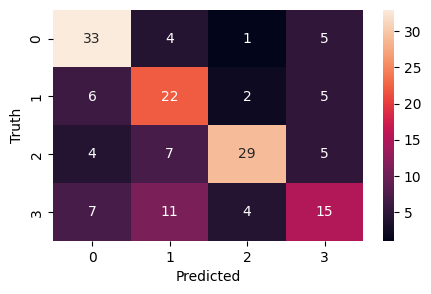

In [20]:
import seaborn as sn
plt.figure(figsize=(5,3))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [21]:
y_prob_lr = breed.predict_proba(X_test)  # Probabilities for ROC

In [22]:
# Loss Curve
train_sizes, train_scores, test_scores = learning_curve(breed, X_train, y_train, cv=5, scoring='neg_log_loss')
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

train_loss = -np.mean(train_scores, axis=1)
test_loss = -np.mean(test_scores, axis=1)

for size, train_l, test_l in zip(train_sizes, train_loss, test_loss):
    print(f"Training Size: {size}, Training Loss: {train_l:.4f}, Test Loss: {test_l:.4f}")

Training Size: 51, Training Loss: 0.0254, Test Loss: 1.8188
Training Size: 166, Training Loss: 0.0342, Test Loss: 1.4048
Training Size: 281, Training Loss: 0.0366, Test Loss: 1.4160
Training Size: 396, Training Loss: 0.0395, Test Loss: 1.4421
Training Size: 512, Training Loss: 0.0480, Test Loss: 1.5545


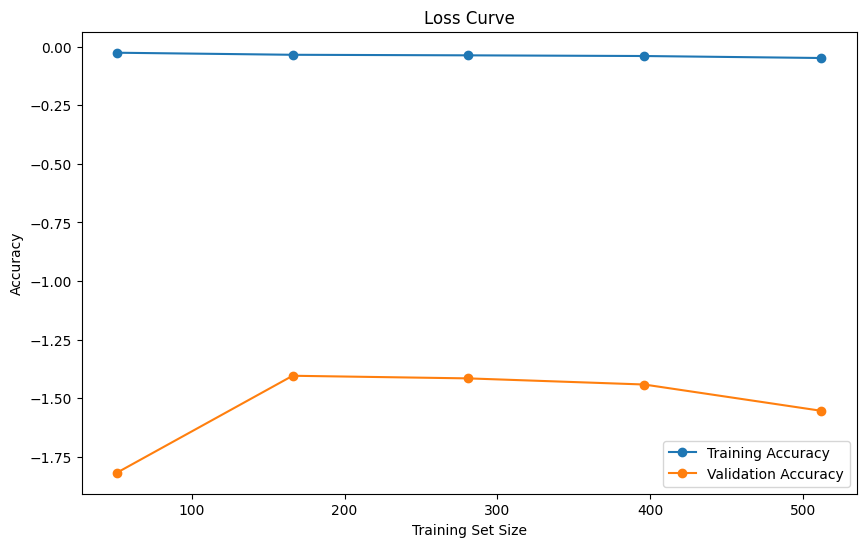

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', label="Training Accuracy")
plt.plot(train_sizes, test_mean, 'o-', label="Validation Accuracy")
plt.title("Loss Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

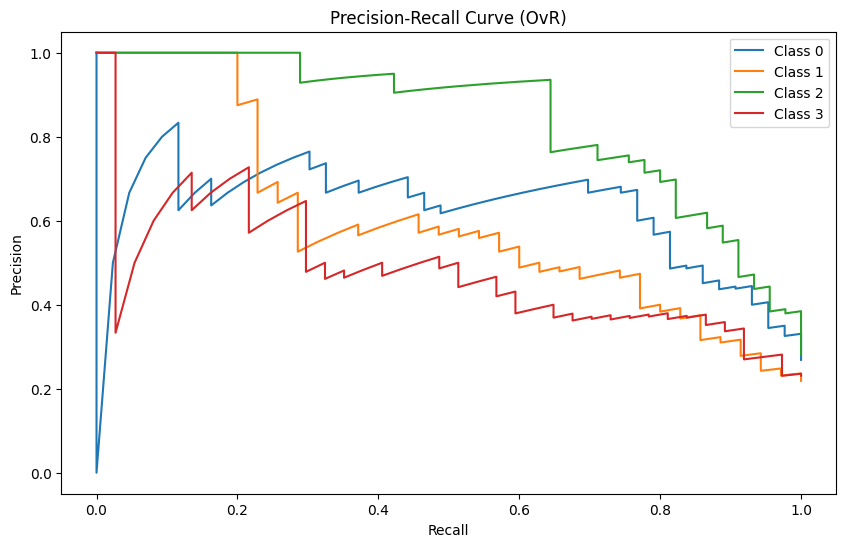

In [24]:
# Precision-Recall
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve

# Binarize y_test
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)


# Precision-Recall Curve for each class
plt.figure(figsize=(10, 6))
for i in range(len(classes)):  # Iterate over all classes
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_prob_lr[:, i])
    plt.plot(recall, precision, label=f'Class {classes[i]}')

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (OvR)")
plt.legend()
plt.show()


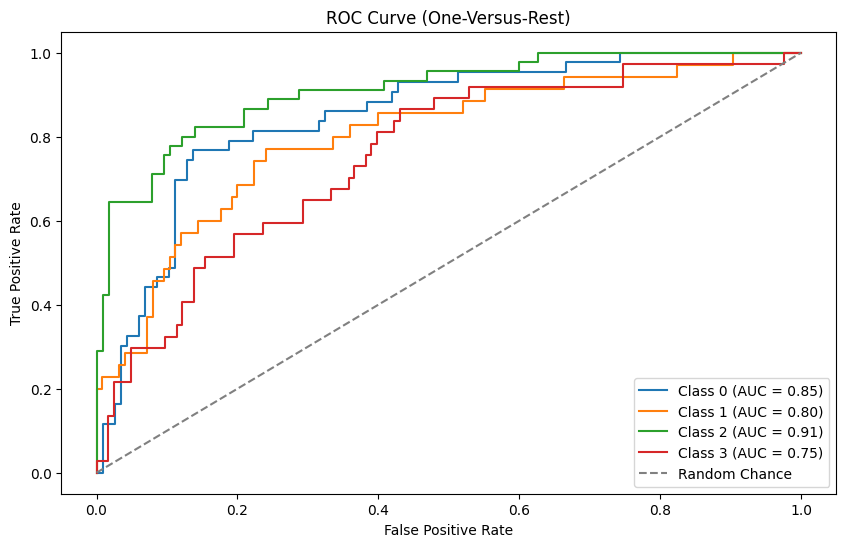

In [25]:
# ROC Curve
# Binarize the labels for OvR
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)

# Plot ROC Curve for each class
plt.figure(figsize=(10, 6))
auc_scores = {}

for i in range(len(classes)):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob_lr[:, i])
    roc_auc = auc(fpr, tpr)
    auc_scores[classes[i]] = roc_auc
    plt.plot(fpr, tpr, label=f"Class {classes[i]} (AUC = {roc_auc:.2f})")

# Add diagonal line for reference
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Chance')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (One-Versus-Rest)")
plt.legend()
plt.show()


In [26]:
# Print AUC scores for each class
print("AUC Scores for Each Class:")
for cls, score in auc_scores.items():
    print(f"Class {cls}: AUC = {score:.2f}")

AUC Scores for Each Class:
Class 0: AUC = 0.85
Class 1: AUC = 0.80
Class 2: AUC = 0.91
Class 3: AUC = 0.75


Ploting and testing the model for visualization

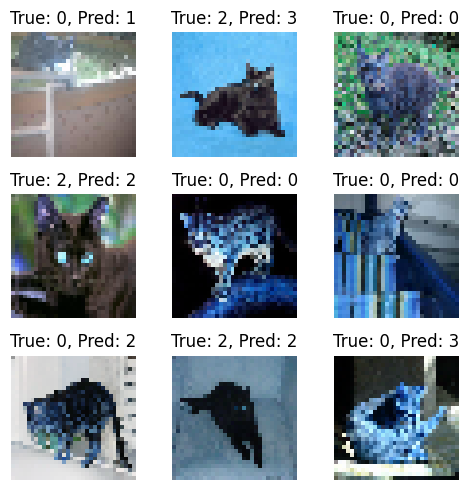

In [27]:
random_indices = random.sample(range(len(X_test)), 9)
plt.figure(figsize=(5, 5))

for idx, i in enumerate(random_indices):
    plt.subplot(3, 3, idx + 1)  # Place in 3x3 grid
    plt.imshow(X_test[i].reshape(32, 32, 3), cmap='gray')  # Reshape to 32x32x3
    plt.title(f"True: {y_test[i]}, Pred: {y_pred[i]}")  # Use correct labels
    plt.axis('off')  # Turn off axes for cleaner display

plt.tight_layout()
plt.show()

## KNN Model

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)  # Using 5 neighbors
knn.fit(X_train, y_train)

# Evaluate Model
y_pred_knn = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))


KNN Accuracy: 0.50625
              precision    recall  f1-score   support

           0       0.43      0.74      0.55        43
           1       0.33      0.37      0.35        35
           2       0.90      0.60      0.72        45
           3       0.56      0.24      0.34        37

    accuracy                           0.51       160
   macro avg       0.55      0.49      0.49       160
weighted avg       0.57      0.51      0.50       160



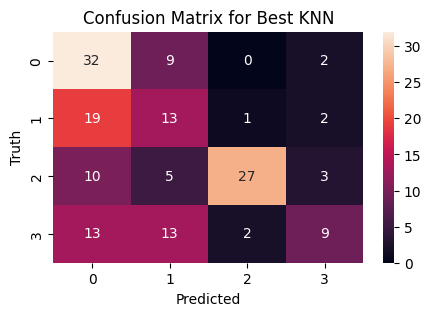

In [29]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(5, 3))
sn.heatmap(cm_knn, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix for Best KNN')
plt.show()

In [30]:
y_prob_lr = knn.predict_proba(X_test)

In [36]:
# Loss Curve
train_sizes, train_scores, test_scores = learning_curve(knn, X_train, y_train, cv=10, scoring='neg_log_loss')
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

train_loss = -np.mean(train_scores, axis=1)
test_loss = -np.mean(test_scores, axis=1)

In [37]:
for size, train_l, test_l in zip(train_sizes, train_loss, test_loss):
    print(f"Training Size: {size}, Training Loss: {train_l:.4f}, Test Loss: {test_l:.4f}")

Training Size: 57, Training Loss: 0.8208, Test Loss: 5.3170
Training Size: 187, Training Loss: 0.7952, Test Loss: 5.2345
Training Size: 316, Training Loss: 0.7914, Test Loss: 5.4365
Training Size: 446, Training Loss: 0.7759, Test Loss: 5.9483
Training Size: 576, Training Loss: 0.7503, Test Loss: 5.7228


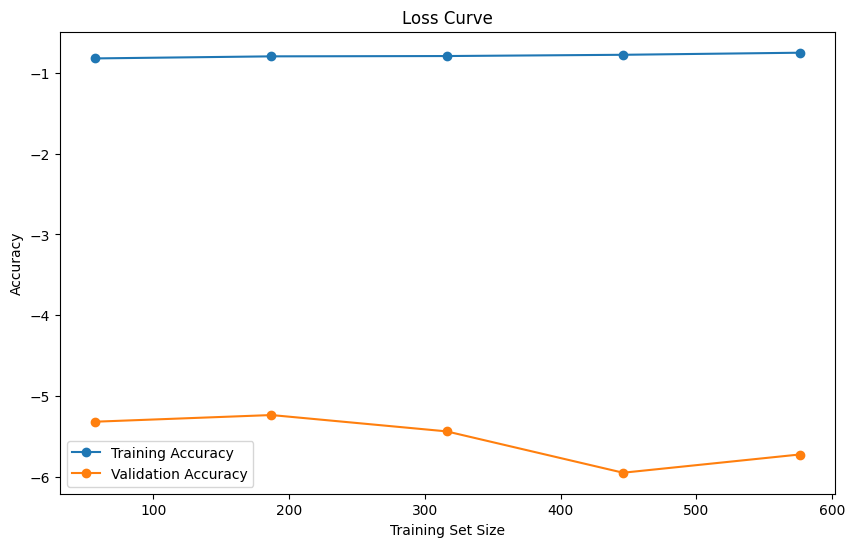

In [38]:
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', label="Training Accuracy")
plt.plot(train_sizes, test_mean, 'o-', label="Validation Accuracy")
plt.title("Loss Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

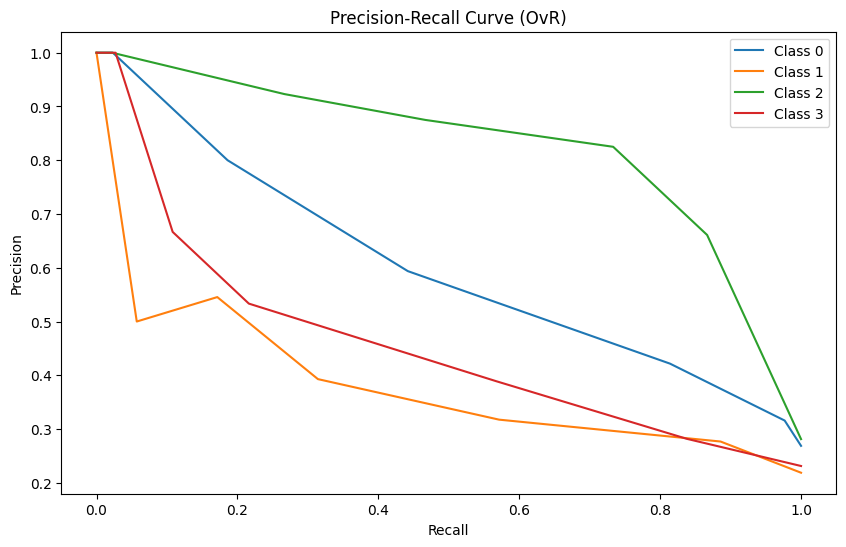

In [33]:
# Precision-Recall
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve

# Binarize y_test
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)

# Precision-Recall Curve for each class
plt.figure(figsize=(10, 6))
for i in range(len(classes)):  # Iterate over all classes
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_prob_lr[:, i])
    plt.plot(recall, precision, label=f'Class {classes[i]}')

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (OvR)")
plt.legend()
plt.show()

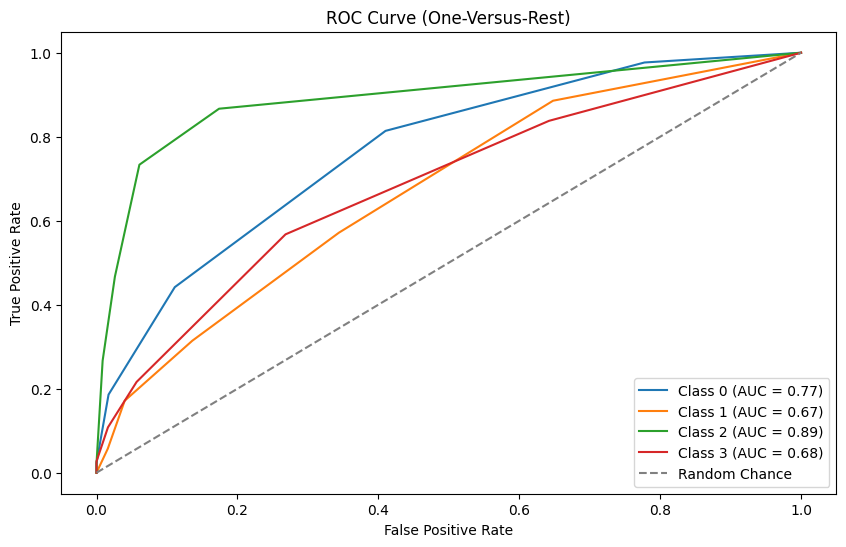

In [34]:
# ROC Curve
# Binarize the labels for OvR
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)

# Plot ROC Curve for each class
plt.figure(figsize=(10, 6))
auc_scores = {}

for i in range(len(classes)):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob_lr[:, i])
    roc_auc = auc(fpr, tpr)
    auc_scores[classes[i]] = roc_auc
    plt.plot(fpr, tpr, label=f"Class {classes[i]} (AUC = {roc_auc:.2f})")

# Add diagonal line for reference
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Chance')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (One-Versus-Rest)")
plt.legend()
plt.show()

In [35]:
# Print AUC scores for each class
print("AUC Scores for Each Class:")
for cls, score in auc_scores.items():
    print(f"Class {cls}: AUC = {score:.2f}")

AUC Scores for Each Class:
Class 0: AUC = 0.77
Class 1: AUC = 0.67
Class 2: AUC = 0.89
Class 3: AUC = 0.68
